In [1]:
#conda install tensorflow

In [2]:
#Importing various necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading musk_csv.csv file and printing out its head

df = pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
#Printing the information of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [5]:
# Description of the data frame

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,6598.0,3299.500000,1904.822870,1.0,1650.25,3299.5,4948.75,6598.0
f1,6598.0,58.945135,53.249007,-31.0,37.00,44.0,53.00,292.0
f2,6598.0,-119.128524,90.813375,-199.0,-193.00,-149.0,-95.00,95.0
f3,6598.0,-73.146560,67.956235,-167.0,-137.00,-99.0,-19.00,81.0
f4,6598.0,-0.628372,80.444617,-114.0,-70.00,-25.0,42.00,161.0
...,...,...,...,...,...,...,...,...
f163,6598.0,201.760230,59.526751,73.0,166.00,191.0,215.00,625.0
f164,6598.0,-47.488330,55.069365,-289.0,-68.00,-60.0,-45.00,295.0
f165,6598.0,-150.259927,76.019023,-428.0,-179.00,-150.0,-120.00,168.0
f166,6598.0,41.770233,94.116085,-471.0,-9.00,27.0,119.00,367.0


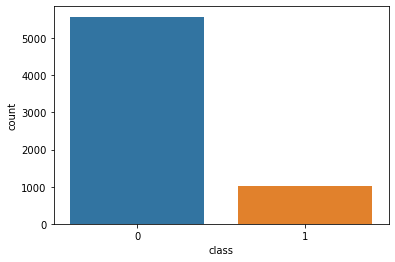

In [6]:
# Checking the data is balanced or inbalanced 

sns.countplot(x='class',data=df)

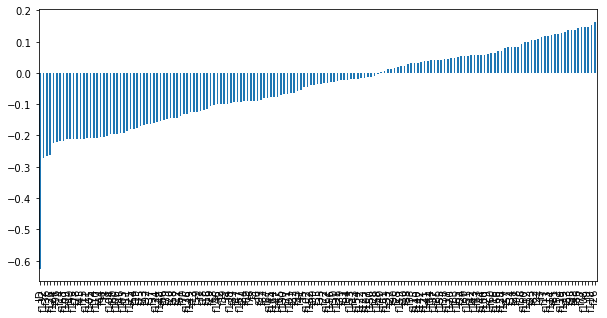

In [7]:
# getting correlation Class with different features of the dataset

plt.figure(figsize=(10,5))
df.corr()['class'][:-1].sort_values().plot(kind='bar')

# This shows that 60% of the features has a negative correlation with the class column

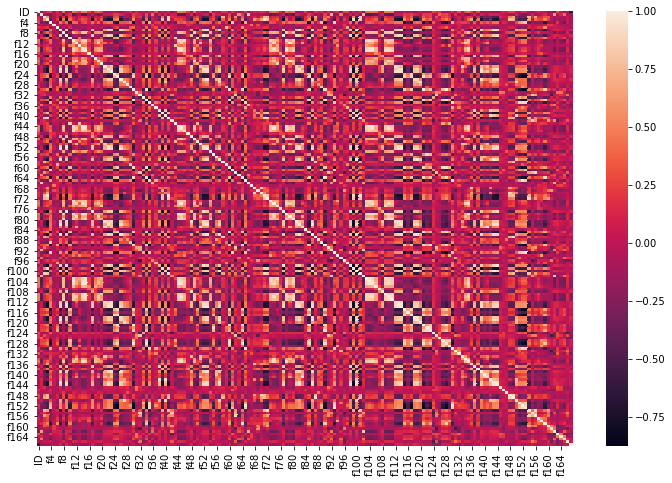

In [8]:
# plotting heatmap to show the correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [9]:
# Declaring feature variable and target variable.

X = df.drop(['class','conformation_name','molecule_name'],axis=1).values
y = df['class'].values

In [10]:
# Diving the data to train/test.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [11]:
# Data preprocessing -  Min Max Scalling (importing and calling MinMaxScaler instance)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
# Fitting and transforming feature train data and transforming the feature validation data. (no need to scale target data.)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Training - Calling necessary deep learning libraries.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
# getting the shape of training data

X_train.shape

(5278, 167)

In [15]:
# Model construction - input layer of 30 neurons, 1 hidden layer of 15 neurons and an output layer. Activation function is 
# relu for input and hidden layer whereas for output layer it as sigmoid as it is a binary classification.

# Early stopping used to stop over fitting and droup out layer is added for the same.

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary Classiification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
# Model fitting with training and validation data also setting the epochs value to 600 but it will stop itself if 
# overfitting happens.

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 5278 samples, validate on 1320 samples
Epoch 1/600
5278/5278 [==============================] - 31s 6ms/sample - loss: 0.4818 - val_loss: 0.3782
Epoch 2/600
5278/5278 [==============================] - 25s 5ms/sample - loss: 0.3838 - val_loss: 0.2943
Epoch 3/600
5278/5278 [==============================] - 30s 6ms/sample - loss: 0.3031 - val_loss: 0.2086
Epoch 4/600
5278/5278 [==============================] - 27s 5ms/sample - loss: 0.2348 - val_loss: 0.1435
Epoch 5/600
5278/5278 [==============================] - 34s 6ms/sample - loss: 0.1857 - val_loss: 0.1022: 0.1
Epoch 6/600
5278/5278 [==============================] - 29s 5ms/sample - loss: 0.1501 - val_loss: 0.0840
Epoch 7/600
5278/5278 [==============================] - 31s 6ms/sample - loss: 0.1163 - val_loss: 0.0499
Epoch 8/600
5278/5278 [==============================] - 27s 5ms/sample - loss: 0.0978 - val_loss: 0.0367
Epoch 9/600
5278/5278 [==============================] - 31s 6ms/sample - loss: 0.0807 - val_loss: 

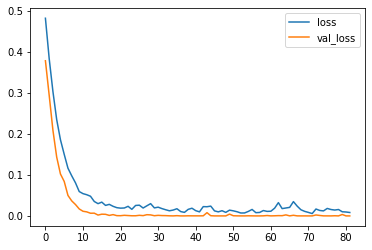

In [32]:
#Plotting the Loss Graphs for training and validation datasets. 

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
# storing the model predictions in a variable.

predictions = model.predict_classes(X_test)

In [37]:
# Importing libraries for getting confusion matrix and classification report for actual output to predicted output.

from sklearn.metrics import classification_report,confusion_matrix

In [38]:
# classification report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115
           1       1.00      1.00      1.00       205

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [21]:
# confusion matrix

print(confusion_matrix(y_test,predictions))

[[1115    0]
 [   0  205]]
